In [1]:
import re
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# # Set pandas options to display all columns and rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

## Looping through scraped data from 100X100trail

In [3]:
races = ['TOR330'
#         ,'TOR450'
        ]
years = [ #'2021',
         '2022',
        #  '2023', '2024'
        ]

TORX_df = {}

for race in races:
    for year in years:
        df = pd.read_excel(f'{race} Data/100x100trail/aid_station_{race}_{year}.xlsx',
                                 dtype={'Start Date': 'string',
                                        'Year': 'string'})
        print(f'{race}_{year} {df.shape}')
        # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
        TORX_df[f'{race}_{year}'] = df
    print('*'*50),

TOR330_2022 (34940, 10)
**************************************************


In [4]:
TORX_df_concat = pd.concat(TORX_df)

In [5]:

TOR330 = TORX_df_concat[TORX_df_concat['Year'] == year]
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2022 0  Russi Jonas    3   M          CH  TOR330  2022      SEN   
            1  Russi Jonas    3   M          CH  TOR330  2022      SEN   
            2  Russi Jonas    3   M          CH  TOR330  2022      SEN   
            3  Russi Jonas    3   M          CH  TOR330  2022      SEN   
            4  Russi Jonas    3   M          CH  TOR330  2022      SEN   

                                                    Place  \
TOR330_2022 0                660 - FINISH 330|349.3|30879   
            1       650 - Mont de la Saxe 330|344.5|30828   
            2  640 - Pas Entre Deux Sauts 330|335.6|30486   
            3         630 - Rif. Frassati 330|329.7|29862   
            4                620 - Bosses 330|320.6|28650   

                                    Time  Status  
TOR330_2022 0  2022-09-14T08:31:36+00:00    True  
            1  2022-09-14T07:33:56+00:00    True  
            2  2022-09-14T05:30:00+00:00    True  
            3  2022-09-14T03:58:37+00:00    True  
            4  2022-09-14T00:54:36+00:00    True

In [6]:
def counting_finish_DNF_dataset(df):
    for year in years :
        for race in races:

            if len(df['Name'][(df['Year'] == year) & (df['Race'] == race)].unique()) != 0:
                print(race , year)
                ## The data is currently stacked so every checkpoint has a unique row
                # using the unique function to count unique participants in the data
                print('# of Partipants:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race)].unique()))
                
                
                
                # Finishers
                print('# of Finishers:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race) &
                                                        (df['Status'] ==  True)].unique()))
                # DNFs
                print('# of DNFs:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race) &
                                                        (df['Status'] ==  False)].unique()))
                print('*'*20)
            else:
                pass
            
counting_finish_DNF_dataset(TOR330)

TOR330 2022
# of Partipants: 960
# of Finishers: 408
# of DNFs: 552
********************


In [7]:
def counting_groupby_dataset(df, column):
    for year in years :
        for race in races:
            
            df = df[['Name', 'Status', 'Year', 'Race']].drop_duplicates()

            if len(df['Name'][(df['Year'] == year) & (df['Race'] == race)].unique()) != 0:
                print(race , year)
                ## The data is currently stacked so every checkpoint has a unique row
                # using the unique function to count unique participants in the data
                print('# of Partipants:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race)].unique()), '\n')
                
                print(df.groupby([column])[column].count())
                print('*'*20)
            else:
                pass
counting_groupby_dataset(df,  'Status')

TOR330 2022
# of Partipants: 960 

Status
False    552
True     408
Name: Status, dtype: int64
********************


### DUV and ITRA data

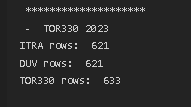


In [8]:
    TORX_duv_df = pd.read_excel(f'Database Data/TORX_duv_df.xlsx',
                                     dtype={'Start Date': 'string',
                                            'Year': 'string'})

    TORX_itra_no_DNF = pd.read_excel(f'Database Data/TORX_itra_no_DNF.xlsx',
                                     dtype={'Start Date': 'string',
                                           'Year': 'string'})

In [9]:
def find_out_the_rows_difference_between_datasets(df):
    for year in years :
        for race in races:
            if len(df['Name'][(df['Year'] == year)]) != 0:

                print(race, year)
                print('# ITRA rows: ', TORX_itra_no_DNF[(TORX_itra_no_DNF['Year'] == year) &
                                  (TORX_itra_no_DNF['Race'] == race)].shape[0])
                print('# DUV rows: ',TORX_duv_df[(TORX_duv_df['Year'] == year) &
                                  (TORX_duv_df['Race'] == race)].shape[0])

                print('# TOR330 rows: ', len(df['Name'][(df['Year'] == year) &
                                                 (df['Race'] == race) &
                                                 (df['Status'] == True)].unique()))
                print('\n', '*'*20)
            else: 
                pass
        
        
    print(' - ','TOR330','2022')
    print(TORX_itra_no_DNF[(TORX_itra_no_DNF['Race'] == 'TOR330') &
                          (TORX_itra_no_DNF['Year'] == '2022')].groupby(['Status'])['Status'].count())
    print('\n', '*'*20)


In [10]:
counting_finish_DNF_dataset(TOR330)
find_out_the_rows_difference_between_datasets(TOR330)
counting_groupby_dataset(TOR330,  'Status')

TOR330 2022
# of Partipants: 960
# of Finishers: 408
# of DNFs: 552
********************
TOR330 2022
# ITRA rows:  590
# DUV rows:  408
# TOR330 rows:  408

 ********************
 -  TOR330 2022
Status
Finished                        408
Finished at Bosses               81
Finished at Rifugio Frassati    101
Name: Status, dtype: int64

 ********************
TOR330 2022
# of Partipants: 960 

Status
False    552
True     408
Name: Status, dtype: int64
********************


### Cleaning Place column

In [11]:
TOR330['Place'].unique()

array(['660 - FINISH 330|349.3|30879',
       '650 - Mont de la Saxe 330|344.5|30828',
       '640 - Pas Entre Deux Sauts 330|335.6|30486',
       '630 - Rif. Frassati 330|329.7|29862',
       '620 - Bosses 330|320.6|28650',
       '610 - Ponteille Desot 330|308.9|28045',
       '590 - Rif. Champillon 330|303.5|27681',
       '581 - Ollomont OUT330|298.5|26602',
       '580 - Ollomont 330 IN|298.5|26602',
       '560 - Bruson Arp 330|290.2|26057', '550 - Oyace 330|285.1|25038',
       '540 - Biv. R. Clermont 330|274.4|24682', '530 - Rif. Cuney 130',
       '520 - Rif. Magià 330|266.6|23540',
       '510 - Vareton 330|257.9|22911',
       '490 - Rif. Barmasse 330|252.8|22390',
       '481 - Valtournenche OUT 330|248.2|21547',
       '480 - Valtournenche 130 IN', '470 - Rif. Grand Tournalin 130',
       '460 - Champoluc 330|230.8|20019',
       '450 - Rif. Alpenzu 330|218.7|18826',
       '381 - Gressoney 330 OUT|213.4|18300',
       '380 - Gressoney 330 IN|213.4|18300', '370 - Loo|206|1

In [12]:
TOR330['aid_stations'] = TOR330['Place'].str.split(r'^\d+ - ').str.get(-1)

TOR330['aid_stations'] = TOR330['aid_stations'].str.replace(r'\d+', '', regex=True)
TOR330['aid_stations'] = TOR330['aid_stations'].str.split('|').str.get(0)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Niel - ','Niel ')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Oyace','Oyace')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('  ',' ')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Mont de la Saxe','Monte de la Saxe')
TOR330['aid_stations'] = TOR330['aid_stations'].str.strip()

TOR330['RITIRIO'] = np.where(
    TOR330['aid_stations'].str.contains('RITIRO', na=False), 
    TOR330['aid_stations'],  '')
# TOR330['RITIRIO] =TOR330['RITIRIO].str.replace('- RITIRO', '')
TOR330['aid_stations'] = TOR330['aid_stations'].str.split(' - RITIRO').str.get(0)
TOR330['aid_stations'].unique()

C:\Users\Karina\AppData\Local\Temp\ipykernel_4956\2264287986.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
C:\Users\Karina\AppData\Local\Temp\ipykernel_4956\2264287986.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')


array(['FINISH', 'Monte de la Saxe', 'Pas Entre Deux Sauts',
       'Rifugio Frassati', 'Bosses', 'Ponteille Desot',
       'Rifugio Champillon', 'Ollomont OUT', 'Ollomont IN', 'Bruson Arp',
       'Oyace', 'Bivacco R. Clermont', 'Rifugio Cuney', 'Rifugio Magià',
       'Vareton', 'Rifugio Barmasse', 'Valtournenche OUT',
       'Valtournenche IN', 'Rifugio Grand Tournalin', 'Champoluc',
       'Rifugio Alpenzu', 'Gressoney OUT', 'Gressoney IN', 'Loo',
       'Niel La Gruba', 'Col della Vecchia', 'Lago Chiaro',
       'Rifugio della Barma', 'Rifugio Coda', 'Sassa', 'Perloz',
       'Donnas OUT', 'Donnas IN', 'Pontboset', 'Chardonney',
       'Rifugio Dondena', 'Goilles', 'Cogne OUT', 'Cogne IN',
       'Rifugio Sella', 'Eaux Rousse', 'Rhemes-Notre-Dame', 'Chalet Epee',
       'Valgrisenche OUT', 'Valgrisenche IN', 'Planaval', 'Promoud',
       'Rifugio Deffeyes', 'La Thuile', 'START', 'Baite Youlaz'],
      dtype=object)

In [13]:
TOR330['RITIRIO'].unique()

array(['', 'START - RITIRO'], dtype=object)

### Reading in TORX dates extracted from DUV

In [14]:
file = f'Database Data/TORX_duv_dates_df.xlsx'
dates_duv_df = pd.read_excel(file)

# Drop the intermediate columns if they're no longer needed
dates_duv_df = dates_duv_df.drop(columns=['Day_of_Week Start_Date'])    
dates_duv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Race        26 non-null     object        
 1   Year        26 non-null     int64         
 2   Start Date  26 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 752.0+ bytes


### Cleaning Time column

Column '2024-09-11T07:08:32+02:00' needs to be fixed into '2024-09-11 07:08:32' and turned into the datetime

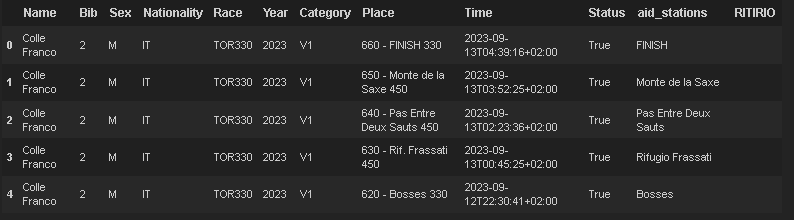

In [15]:
# 2024-09-11T07:08:32+02:00

# Split the 'Time' column to remove the timezone offset
TOR330['new_Time'] = TOR330['Time'].str.split('+').str[0]

# Convert the cleaned time string to a datetime object
TOR330['new_Time'] = pd.to_datetime(TOR330['new_Time'])

# # Add the 2-hour offset using timedelta
# # NO NEED!!!
# TOR330['new_Time'] = TOR330['new_Time'] + pd.to_timedelta('02:00:00')

# Preview the DataFrame
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2022 0  Russi Jonas    3   M          CH  TOR330  2022      SEN   
            1  Russi Jonas    3   M          CH  TOR330  2022      SEN   
            2  Russi Jonas    3   M          CH  TOR330  2022      SEN   
            3  Russi Jonas    3   M          CH  TOR330  2022      SEN   
            4  Russi Jonas    3   M          CH  TOR330  2022      SEN   

                                                    Place  \
TOR330_2022 0                660 - FINISH 330|349.3|30879   
            1       650 - Mont de la Saxe 330|344.5|30828   
            2  640 - Pas Entre Deux Sauts 330|335.6|30486   
            3         630 - Rif. Frassati 330|329.7|29862   
            4                620 - Bosses 330|320.6|28650   

                                    Time  Status          aid_stations  \
TOR330_2022 0  2022-09-14T08:31:36+00:00    True                FINISH   
            1  2022-09-14T07:33:56+00:00    True      Monte de la Saxe   
            2  2022-09-14T05:30:00+00:00    True  Pas Entre Deux Sauts   
            3  2022-09-14T03:58:37+00:00    True      Rifugio Frassati   
            4  2022-09-14T00:54:36+00:00    True                Bosses   

              RITIRIO            new_Time  
TOR330_2022 0         2022-09-14 08:31:36  
            1         2022-09-14 07:33:56  
            2         2022-09-14 05:30:00  
            3         2022-09-14 03:58:37  
            4         2022-09-14 00:54:36

In [16]:
counting_finish_DNF_dataset(TOR330)
find_out_the_rows_difference_between_datasets(TOR330)
counting_groupby_dataset(TOR330,  'Status')

TOR330 2022
# of Partipants: 960
# of Finishers: 408
# of DNFs: 552
********************
TOR330 2022
# ITRA rows:  590
# DUV rows:  408
# TOR330 rows:  408

 ********************
 -  TOR330 2022
Status
Finished                        408
Finished at Bosses               81
Finished at Rifugio Frassati    101
Name: Status, dtype: int64

 ********************
TOR330 2022
# of Partipants: 960 

Status
False    552
True     408
Name: Status, dtype: int64
********************


### PIVOTING the Dataset

In [17]:
# Pivot the data so that each participant has its own column
pivoted_TOR330 = TOR330.pivot_table(
    index=['Name','Bib', 'Sex', 
           'Nationality', 'Category', 'Race','Year', 'Status'# , 'RITIRIO'
          ],
    columns='aid_stations',  
    values='new_Time',
    aggfunc='first'  # Ensures only the first match is kept in case of duplicates
).reset_index()

pivoted_TOR330.head()

aid_stations,Name,Bib,Sex,Nationality,Category,Race,Year,Status,Baite Youlaz,Bivacco R. Clermont,...,Rifugio Magià,Rifugio Sella,Rifugio della Barma,START,Sassa,Valgrisenche IN,Valgrisenche OUT,Valtournenche IN,Valtournenche OUT,Vareton
0,Aakre Eivind,1325,M,NO,V2,TOR330,2022,False,2022-09-11 15:12:45,NaT,...,NaT,NaT,NaT,2022-09-11 11:21:45,NaT,2022-09-12 02:43:23,2022-09-12 04:12:59,NaT,NaT,NaT
1,Acerbi Luca,1397,M,IT,V3,TOR330,2022,False,2022-09-11 15:31:05,NaT,...,NaT,NaT,NaT,2022-09-11 11:20:08,NaT,2022-09-12 04:23:57,2022-09-12 05:16:18,NaT,NaT,NaT
2,Agosti Alessandro,1361,M,IT,V1,TOR330,2022,False,2022-09-11 15:38:04,NaT,...,NaT,NaT,NaT,2022-09-11 11:26:21,NaT,2022-09-12 06:00:44,2022-09-12 07:29:16,NaT,NaT,NaT
3,Aimo Michela,1133,F,IT,V1,TOR330,2022,False,2022-09-11 15:04:01,2022-09-16 10:41:48,...,2022-09-16 06:34:28,2022-09-13 00:04:41,2022-09-14 11:45:41,2022-09-11 11:34:13,2022-09-14 04:03:47,2022-09-12 02:46:31,2022-09-12 04:22:20,2022-09-15 18:07:44,2022-09-15 21:51:32,NaT
4,Alba Raimondo,413,M,IT,V1,TOR330,2022,False,2022-09-11 12:30:07,NaT,...,NaT,2022-09-12 17:25:03,2022-09-14 10:19:46,2022-09-11 09:24:47,2022-09-13 23:05:07,2022-09-11 22:25:16,2022-09-11 23:38:03,NaT,NaT,NaT


In [18]:
counting_finish_DNF_dataset(TOR330)
find_out_the_rows_difference_between_datasets(TOR330)
counting_groupby_dataset(TOR330,  'Status')

TOR330 2022
# of Partipants: 960
# of Finishers: 408
# of DNFs: 552
********************
TOR330 2022
# ITRA rows:  590
# DUV rows:  408
# TOR330 rows:  408

 ********************
 -  TOR330 2022
Status
Finished                        408
Finished at Bosses               81
Finished at Rifugio Frassati    101
Name: Status, dtype: int64

 ********************
TOR330 2022
# of Partipants: 960 

Status
False    552
True     408
Name: Status, dtype: int64
********************


### RITIRIO
Issues with retired because there are both blanks and ' - Ritirio' for each person

In [19]:
ritirio_df = TOR330[~(TOR330['RITIRIO'] == '')]

# Merge the datsets back after pivoting
pivoted_TOR330 = pivoted_TOR330.merge(
    ritirio_df[['Bib', 'RITIRIO']].drop_duplicates(),  # Ensure no duplicates in 'Bib' and 'RITIRIO'
    on='Bib',
    how='left'
)

In [20]:
# reordering columns 
pivoted_TOR330 = pivoted_TOR330[[
'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race','Category', 'Status', 'RITIRIO',  
'START', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
    # 'Bivacco Zappelli', 'Col Brison', 'Berio Damon' # Dropping these because its not very useful anyway!
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame',
    'Eaux Rousse', 'Rifugio Sella', 'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 
    'Chardonney', 'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia', 'Niel La Gruba', 'Loo',
    'Gressoney IN', 'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 
    'Valtournenche IN', 'Valtournenche OUT',  'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 
    'Oyace', 'Bruson Arp',   'Ollomont IN', 
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 
    'Pas Entre Deux Sauts', 'Monte de la Saxe', 'FINISH']]

pivoted_TOR330.head()

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,RITIRIO,START,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Aakre Eivind,1325,M,NO,2022,TOR330,V2,False,NaN,2022-09-11 11:21:45,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,Acerbi Luca,1397,M,IT,2022,TOR330,V3,False,NaN,2022-09-11 11:20:08,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,Agosti Alessandro,1361,M,IT,2022,TOR330,V1,False,NaN,2022-09-11 11:26:21,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Aimo Michela,1133,F,IT,2022,TOR330,V1,False,NaN,2022-09-11 11:34:13,...,NaT,2022-09-16 18:15:40,2022-09-16 20:34:34,2022-09-16 23:20:02,2022-09-17 03:27:29,2022-09-17 06:04:32,NaT,NaT,NaT,NaT
4,Alba Raimondo,413,M,IT,2022,TOR330,V1,False,NaN,2022-09-11 09:24:47,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


### Dealing with Anomalies

In [21]:
# Looking for runners who have FINISHED< BUT have missing values for all last 3 checkpoints!
anomalies_df = pivoted_TOR330[(pivoted_TOR330['Status'] == True) &
               (pivoted_TOR330['Bosses'].isna()) &                
               (pivoted_TOR330['Rifugio Frassati'].isna()) & 
               (pivoted_TOR330['Pas Entre Deux Sauts'].isna()) &
               (pivoted_TOR330['Monte de la Saxe'].isna())]

anomalies_df[[ 'Name', 'Bib', 'Year', 'Race', 'Status', 'RITIRIO', 'START',
    	'Ollomont IN',	'Ollomont OUT',
    'Rifugio Champillon', 'Ponteille Desot',
    'Bosses',	'Rifugio Frassati',	'Pas Entre Deux Sauts',	'Monte de la Saxe',
    'FINISH'
    
    
]].reset_index(drop = True)

### Conclusion: Easily visible that there are several other places that have missing values 

,Name,Bib,Year,Race,Status,RITIRIO,START,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH


In [22]:
for name in anomalies_df['Name'].unique():  

    # Fixing the code with .loc[] for proper assignment
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'FINISH'] = pd.NaT
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'Status'] = False

In [23]:
counting_finish_DNF_dataset(pivoted_TOR330)
find_out_the_rows_difference_between_datasets(pivoted_TOR330)
counting_groupby_dataset(pivoted_TOR330,  'Status')

TOR330 2022
# of Partipants: 960
# of Finishers: 408
# of DNFs: 552
********************
TOR330 2022
# ITRA rows:  590
# DUV rows:  408
# TOR330 rows:  408

 ********************
 -  TOR330 2022
Status
Finished                        408
Finished at Bosses               81
Finished at Rifugio Frassati    101
Name: Status, dtype: int64

 ********************
TOR330 2022
# of Partipants: 960 

Status
False    552
True     408
Name: Status, dtype: int64
********************


### Start Line Issues

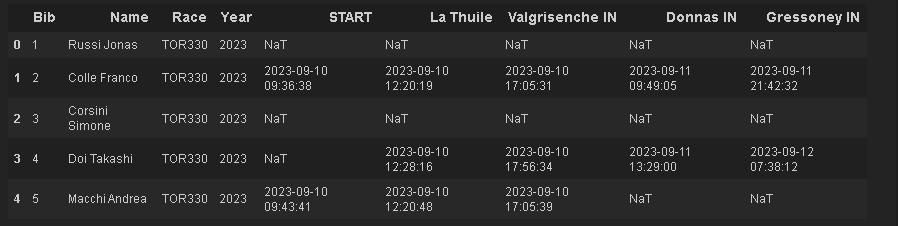

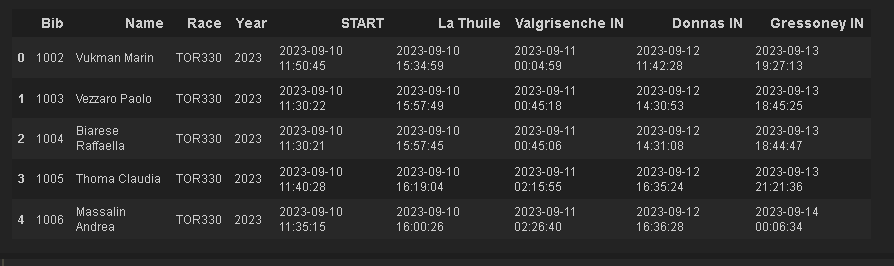

START times are all over the place and this is a MAJOR issue!

In [24]:
pivoted_TOR330[['Bib','Name', 'Race', 'Year',  'START', 'La Thuile', 'Valgrisenche IN', 'Donnas IN', 'Gressoney IN']].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

,Bib,Name,Race,Year,START,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN
0,1,Colle Franco,TOR330,2022,2022-09-11 09:37:06,2022-09-11 12:21:25,2022-09-11 17:23:59,NaT,NaT
1,2,Trigueros Garrote Silvia Ainhoa,TOR330,2022,2022-09-11 09:33:17,2022-09-11 12:33:37,2022-09-11 18:09:29,2022-09-12 14:36:00,2022-09-13 09:03:10
2,3,Russi Jonas,TOR330,2022,2022-09-11 09:32:29,2022-09-11 12:21:38,2022-09-11 17:24:08,2022-09-12 10:42:46,2022-09-12 23:17:36
3,4,Ficek Roman,TOR330,2022,2022-09-11 09:46:08,2022-09-11 12:23:40,2022-09-11 17:23:56,2022-09-12 10:47:52,NaT
4,5,Macchi Andrea,TOR330,2022,2022-09-11 09:45:54,2022-09-11 12:31:02,2022-09-11 18:01:59,2022-09-12 13:32:42,2022-09-13 05:23:16


In [25]:
pivoted_TOR330[['Bib','Name', 'Race', 'Year',  
                'START', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330['Bib']> 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

,Bib,Name,Race,Year,START,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN
0,1003,Palma Andrea,TOR330,2022,2022-09-11 11:23:32,2022-09-11 15:55:06,2022-09-12 02:14:54,2022-09-13 15:20:13,2022-09-14 18:46:39
1,1004,Cornaz Mauro,TOR330,2022,2022-09-11 11:21:00,2022-09-11 15:19:00,2022-09-11 23:47:04,2022-09-13 14:20:47,2022-09-14 20:00:34
2,1005,Scudieri Adriano,TOR330,2022,2022-09-11 11:26:01,2022-09-11 15:54:44,2022-09-12 01:08:46,2022-09-13 13:18:42,2022-09-14 18:24:06
3,1006,Meek Jon,TOR330,2022,2022-09-11 11:23:21,2022-09-11 15:33:16,2022-09-12 00:59:36,NaT,NaT
4,1007,Bernorio Alessandro,TOR330,2022,2022-09-11 11:52:00,2022-09-11 15:58:21,2022-09-12 00:44:10,2022-09-13 13:08:57,2022-09-14 16:48:54


### Adding dates into TOR330

In [26]:
pivoted_TOR330['Year'] = pivoted_TOR330['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# have I dropped any rows?
print(pivoted_TOR330.shape)

# Merging on two columns: 'Race' and 'Year'
pivoted_TOR330_dates = pd.merge(pivoted_TOR330, dates_duv_df, on=['Race', 'Year'], how='inner')

# have I dropped any rows?
print(pivoted_TOR330_dates.shape)



(960, 58)
(960, 59)


In [27]:
# Following the assumption that every bib prior to 1001 starts at 10:00:00
pivoted_TOR330_dates['new_Start Date'] = np.where(
    pivoted_TOR330_dates['Bib'] < 1001, 
        pivoted_TOR330_dates['Start Date'], 
        pivoted_TOR330_dates['Start Date'] + pd.to_timedelta('02:00:00'))

# Following the assumption that every bib from 1001 onwards starts at 12:00:00
pivoted_TOR330_dates['Wave'] = np.where(
    pivoted_TOR330_dates['Bib'] <= 1001, 
        'Wave1', 
        'Wave2')



In [28]:
pivoted_TOR330_dates[['Bib','Name', 'Race', 'Year',  
                'new_Start Date', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330_dates['Bib']< 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

,Bib,Name,Race,Year,new_Start Date,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN
0,1,Colle Franco,TOR330,2022,2022-09-11 10:00:00,2022-09-11 12:21:25,2022-09-11 17:23:59,NaT,NaT
1,2,Trigueros Garrote Silvia Ainhoa,TOR330,2022,2022-09-11 10:00:00,2022-09-11 12:33:37,2022-09-11 18:09:29,2022-09-12 14:36:00,2022-09-13 09:03:10
2,3,Russi Jonas,TOR330,2022,2022-09-11 10:00:00,2022-09-11 12:21:38,2022-09-11 17:24:08,2022-09-12 10:42:46,2022-09-12 23:17:36
3,4,Ficek Roman,TOR330,2022,2022-09-11 10:00:00,2022-09-11 12:23:40,2022-09-11 17:23:56,2022-09-12 10:47:52,NaT
4,5,Macchi Andrea,TOR330,2022,2022-09-11 10:00:00,2022-09-11 12:31:02,2022-09-11 18:01:59,2022-09-12 13:32:42,2022-09-13 05:23:16


In [29]:
pivoted_TOR330_dates[['Bib','Name', 'Race', 'Year',  
                'new_Start Date', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330_dates['Bib']> 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

,Bib,Name,Race,Year,new_Start Date,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN
0,1003,Palma Andrea,TOR330,2022,2022-09-11 12:00:00,2022-09-11 15:55:06,2022-09-12 02:14:54,2022-09-13 15:20:13,2022-09-14 18:46:39
1,1004,Cornaz Mauro,TOR330,2022,2022-09-11 12:00:00,2022-09-11 15:19:00,2022-09-11 23:47:04,2022-09-13 14:20:47,2022-09-14 20:00:34
2,1005,Scudieri Adriano,TOR330,2022,2022-09-11 12:00:00,2022-09-11 15:54:44,2022-09-12 01:08:46,2022-09-13 13:18:42,2022-09-14 18:24:06
3,1006,Meek Jon,TOR330,2022,2022-09-11 12:00:00,2022-09-11 15:33:16,2022-09-12 00:59:36,NaT,NaT
4,1007,Bernorio Alessandro,TOR330,2022,2022-09-11 12:00:00,2022-09-11 15:58:21,2022-09-12 00:44:10,2022-09-13 13:08:57,2022-09-14 16:48:54


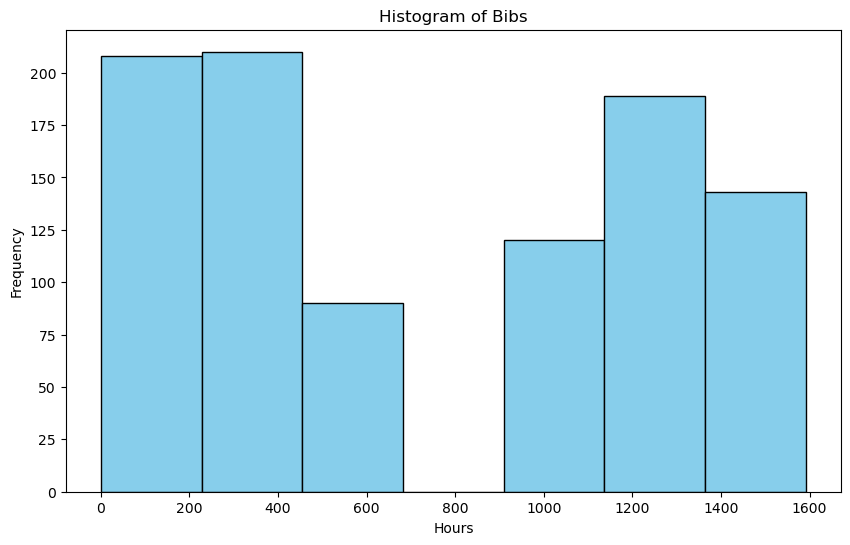

In [30]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(pivoted_TOR330_dates['Bib'], bins=7, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Bibs')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

### Calculating Duration - THE MOST IMPORTANT!

In [31]:
# Calculate Duration
pivoted_TOR330_dates['Duration'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['new_Start Date'] 

# Sort the DataFrame by the 'Duration' column
pivoted_TOR330_dates = pivoted_TOR330_dates.sort_values(by='Duration')


In [32]:
# Reorder the columns in the correct order
pivoted_TOR330_dates = pivoted_TOR330_dates[[
        'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 
        'Category', 'Status','Wave', 'Duration', # MOVING DURATION CLOSER TO THE START SO I CAN SEE IT!
        'RITIRIO',
        'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes',
         'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT',
        'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella',
        'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney',
        'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa',
        'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro',
        'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN',
        'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc',
        'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT',
         'Vareton', 'Rifugio Magià', 'Rifugio Cuney',
        'Bivacco R. Clermont', 'Oyace', 'Bruson Arp', 
         'Ollomont IN', 'Ollomont OUT', 'Rifugio Champillon',
        'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 'Pas Entre Deux Sauts',
        'Monte de la Saxe', 'FINISH'
]]

### Checking accuracy of the Duration calculation

Because of issues with Start Date, it was thought that it would be a good idea to try and compare the DUV and ITRA duration time to establish accuracy of the calculation...

There are issues with the names, so some will be not be successfully merged.

In [33]:
# print(pivoted_TOR330_dates['Duration'][pivoted_TOR330_dates['Name'].str.contains('Jonina')])
# # print(TORX_duv_df['Performance'][TORX_duv_df['Name'].str.contains('Jonina')])
# # Finished in 144:46:43 hours and 

In [34]:
counting_finish_DNF_dataset(pivoted_TOR330)
find_out_the_rows_difference_between_datasets(pivoted_TOR330)
counting_groupby_dataset(pivoted_TOR330,  'Status')

TOR330 2022
# of Partipants: 960
# of Finishers: 408
# of DNFs: 552
********************
TOR330 2022
# ITRA rows:  590
# DUV rows:  408
# TOR330 rows:  408

 ********************
 -  TOR330 2022
Status
Finished                        408
Finished at Bosses               81
Finished at Rifugio Frassati    101
Name: Status, dtype: int64

 ********************
TOR330 2022
# of Partipants: 960 

Status
False    552
True     408
Name: Status, dtype: int64
********************


### How many missing values are there for FINISHERS in each checkpoint

In [35]:
pivoted_TOR330_dates_noDNF = pivoted_TOR330_dates[(pivoted_TOR330_dates['Status'] == True) &
                    ~(pivoted_TOR330_dates['FINISH'].isna())].reset_index()

# print(pivoted_TOR330_dates_noDNF.shape)
print('2023 - 622 FINISHERS - Missing Values')
for i in pivoted_TOR330_dates_noDNF.columns:
    missing_value_count =  pivoted_TOR330_dates_noDNF[i].isna().sum()
    
    if missing_value_count != 0:
        print(' ',i,missing_value_count)


2023 - 622 FINISHERS - Missing Values
  RITIRIO 408
  Baite Youlaz 11
  Rifugio Deffeyes 20
  Valgrisenche OUT 6
  Rhemes-Notre-Dame 1
  Cogne IN 5
  Cogne OUT 11
  Goilles 1
  Rifugio Dondena 1
  Chardonney 1
  Pontboset 1
  Donnas OUT 2
  Sassa 2
  Rifugio della Barma 1
  Col della Vecchia 1
  Loo 12
  Gressoney IN 1
  Gressoney OUT 1
  Rifugio Alpenzu 2
  Valtournenche OUT 2
  Vareton 53
  Bivacco R. Clermont 5
  Bruson Arp 407
  Ollomont IN 7
  Ollomont OUT 9
  Rifugio Champillon 5
  Ponteille Desot 3
  Rifugio Frassati 3
  Pas Entre Deux Sauts 5
  Monte de la Saxe 2


In [36]:

### WHich wave is more likely to finish? 
### Wave 1 seems to have way more finishers - they do have a higher ITRA score, meaning that they are more
### experienced and stronger than Wave 2..
pivoted_TOR330_dates.groupby(['Wave', 'Status'])['Status'].size()

Wave   Status
Wave1  False     198
       True      311
Wave2  False     354
       True       97
Name: Status, dtype: int64

### DNFs 

In [37]:
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates[
                    # selecting all rows that DNFed
                    (pivoted_TOR330_dates['Status'] == False) & # AND
                    # selecting all rows where FINISH does not have a time
                    (pivoted_TOR330_dates['FINISH'].isna())]

pivoted_TOR330_dates_DNF.head()

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Aakre Eivind,1325,M,NO,2022,TOR330,V2,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,Acerbi Luca,1397,M,IT,2022,TOR330,V3,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,Agosti Alessandro,1361,M,IT,2022,TOR330,V1,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Aimo Michela,1133,F,IT,2022,TOR330,V1,False,Wave2,NaT,...,NaT,2022-09-16 18:15:40,2022-09-16 20:34:34,2022-09-16 23:20:02,2022-09-17 03:27:29,2022-09-17 06:04:32,NaT,NaT,NaT,NaT
4,Alba Raimondo,413,M,IT,2022,TOR330,V1,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [38]:
#### What missing values are there? 
### Some missing value is okay due to the fact that they DNFed so they wont have a timestamp
pivoted_TOR330_dates_DNF.isna().sum()

Name                         0
Bib                          0
Sex                          0
Nationality                  0
Year                         0
Race                         0
Category                     0
Status                       0
Wave                         0
Duration                   552
RITIRIO                    548
new_Start Date               0
Baite Youlaz                23
La Thuile                   12
Rifugio Deffeyes            32
Planaval                    29
Valgrisenche IN             33
Valgrisenche OUT            59
Chalet Epee                 62
Rhemes-Notre-Dame           69
Eaux Rousse                 98
Rifugio Sella              146
Cogne IN                   147
Cogne OUT                  167
Goilles                    218
Rifugio Dondena            176
Chardonney                 180
Pontboset                  192
Donnas IN                  192
Donnas OUT                 193
Perloz                     207
Sassa                      213
Rifugio 

### What is the last place of DNFs?

In [39]:
# Function to find the last non-blank column
def get_last_non_blank(row):
    for col in reversed(row.index):
        if pd.notna(row[col]):  # Check if the value is not NaN
#             print(col)
            return col
#     return None  # In case all columns are blank

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Status'] == False, 
                                               pivoted_TOR330_dates.apply(get_last_non_blank, axis=1),
                                               np.nan)


In [40]:
pivoted_TOR330_dates = pivoted_TOR330_dates[['Name', 'Bib',
                                                     'Sex', 'Nationality',
                                                     'Year', 'Race', 
                                                     'Category', 'Status', 'Wave', 'Duration', 
                                                     'RITIRIO', 'Retired', # putting retired at the from and not the back
                                                     'new_Start Date',
       'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
       'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
       'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
       'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
       'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
       'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
       'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
       'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
       'Valtournenche IN', 'Valtournenche OUT',  'Vareton',
       'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
       'Bruson Arp',   'Ollomont IN',
       'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
       'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
       'FINISH']]

In [41]:
# creating a dataset to examine DNFs in the excel
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == False].drop(columns=['Sex', 'Nationality',
                                                          'Category', 'Status', 
                                                          'Wave', 'Duration'])    



# for year in years:
#     pivoted_TOR330_dates_DNF.to_excel(f'TOR330 Data/DNF/DNF_df_{year}.xlsx', index = False)


In [42]:
pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == False].head(1)

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Aakre Eivind,1325,M,NO,2022,TOR330,V2,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [43]:
pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == True].head(1)

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
774,Russi Jonas,3,M,CH,2022,TOR330,SEN,True,Wave1,2 days 22:31:36,...,2022-09-13 18:08:14,2022-09-13 19:20:41,2022-09-13 19:36:16,2022-09-13 21:05:00,2022-09-13 22:49:00,2022-09-14 00:54:36,2022-09-14 03:58:37,2022-09-14 05:30:00,2022-09-14 07:33:56,2022-09-14 08:31:36


### Cleaning Last location

2023
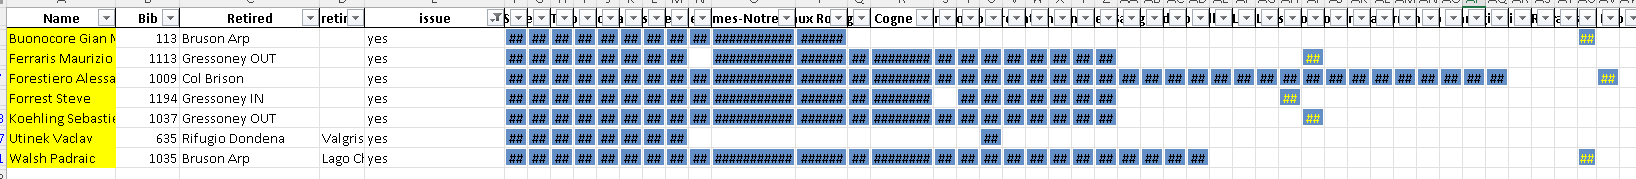

2024

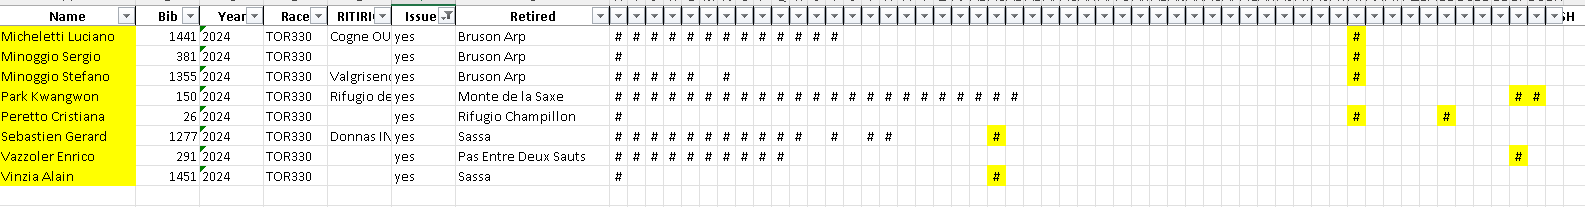


In [44]:
try:
    if year == '2023':

        names_that_DNFed_and_then_popped_up_miles_away =['Utinek Vaclav', 'Walsh Padraic',
                                                        'Ferraris Maurizio', 
    # 'Buonocore Gian Mario', 'Forestiero Alessandro', ## Have 2 timestamps of time travel
                                                         'Forrest Steve','Koehling Sebastien'
                                                        ]
        retired_list = list(pivoted_TOR330_dates['Retired'][
            pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())
        print(retired_list)

        for index, row in pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
            retired_column = row['Retired']  # Get the column name in 'Retired'


            if retired_column in retired_list:
                pivoted_TOR330_dates.at[index, retired_column] = pd.NaT

        # Prepending 'Name' and 'Bib' to the list
        retired_list = ['Name', 'Bib'] + retired_list  + ['Retired']
        print(retired_list)

    elif year == '2024':
        names_that_DNFed_and_then_popped_up_miles_away =['Micheletti Luciano', 'Minoggio Sergio','Minoggio Stefano', 
                                                        'Park Kwangwon',  ## Has 2 time teleportation 
                                                        'Peretto Cristiana', ## Has 2 time teleportation 
                                                        'Sebastien Gerard', 'Vazzoler Enrico', 'Vinzia Alain']

        for index, row in pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
            # Get the column name in 'Retired'
            retired_column = row['Retired']

            retired_list = list(pivoted_TOR330_dates['Retired'][
                pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())

            if row['Name'] == 'Park Kwangwon':
                # Has 2 cases of teletransportation
                pivoted_TOR330_dates.at[index, 'Pas Entre Deux Sauts'] = pd.NaT
                pivoted_TOR330_dates.at[index, 'Monte de la Saxe'] = pd.NaT

            elif row['Name'] == 'Peretto Cristiana':
                # Has 2 cases of teletransportation
                pivoted_TOR330_dates.at[index, 'Rifugio Champillon'] = pd.NaT
                pivoted_TOR330_dates.at[index, 'Bruson Arp'] = pd.NaT

            else:

                if retired_column in retired_list:
                    pivoted_TOR330_dates.at[index, retired_column] = pd.NaT

        retired_list = ['Name', 'Bib'] + retired_list + ['Retired']
        print(retired_list)

     # Display the updated DataFrame
    pivoted_TOR330_dates[retired_list][pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)]

except:
    pass

In [45]:
# Dropping the column retired otherwise it is going to think that RETIRED is the last column
pivoted_TOR330_dates = pivoted_TOR330_dates.drop(columns=['Retired'])    

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Status'] == False, 
                                               pivoted_TOR330_dates.apply(get_last_non_blank, axis=1),
                                               np.nan)

In [46]:
pivoted_TOR330_dates.head()

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired
774,Russi Jonas,3,M,CH,2022,TOR330,SEN,True,Wave1,2 days 22:31:36,...,2022-09-13 19:20:41,2022-09-13 19:36:16,2022-09-13 21:05:00,2022-09-13 22:49:00,2022-09-14 00:54:36,2022-09-14 03:58:37,2022-09-14 05:30:00,2022-09-14 07:33:56,2022-09-14 08:31:36,NaN
211,Corsini Simone,9,M,IT,2022,TOR330,SEN,True,Wave1,3 days 03:27:33,...,2022-09-14 01:59:48,2022-09-14 03:12:08,2022-09-14 04:41:06,2022-09-14 06:12:54,2022-09-14 07:42:22,2022-09-14 10:12:43,2022-09-14 11:40:00,2022-09-14 12:51:15,2022-09-14 13:27:33,NaN
515,Macchi Andrea,5,M,IT,2022,TOR330,SEN,True,Wave1,3 days 04:43:50,...,2022-09-14 03:23:30,2022-09-14 03:47:10,2022-09-14 05:18:03,2022-09-14 06:59:30,2022-09-14 08:34:23,2022-09-14 10:37:02,2022-09-14 12:00:00,2022-09-14 13:42:27,2022-09-14 14:43:50,NaN
556,Mattiato Andrea,12,M,IT,2022,TOR330,V1,True,Wave1,3 days 06:22:28,...,2022-09-14 03:23:19,2022-09-14 03:52:33,2022-09-14 06:23:42,2022-09-14 07:41:06,2022-09-14 08:56:49,2022-09-14 12:05:22,2022-09-14 13:51:54,2022-09-14 15:45:44,2022-09-14 16:22:28,NaN
917,Verjee Sabrina,275,F,GB,2022,TOR330,V1,True,Wave1,3 days 08:19:38,...,2022-09-14 07:04:51,2022-09-14 07:23:59,2022-09-14 09:09:25,2022-09-14 10:40:27,2022-09-14 11:55:52,2022-09-14 14:38:34,2022-09-14 16:16:28,2022-09-14 17:39:56,2022-09-14 18:19:38,NaN


#### Changing Status values to 'Finished' and DNF

In [47]:
pivoted_TOR330_dates['Status1'] = pivoted_TOR330_dates['Status'].astype('str')
# print(pivoted_TOR330_dates['Status1'].unique())

for year in years:
    if year == '2022':
        # Update 'Status1' for year 2022
        pivoted_TOR330_dates.loc[
            pivoted_TOR330_dates['Year'] == year, 'Status1'
        ] = pivoted_TOR330_dates.loc[
            pivoted_TOR330_dates['Year'] == year, 'Status1'
        ].str.replace('True', 'Finished')

        # For finishers at Bosses
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Bosses'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Bosses'), 'Status1'
        ].str.replace('False', 'Finished at Bosses')

        # For finishers at Rifugio Frassati
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ].str.replace('False', 'Rifugio Frassati')

        # For finishers at Rifugio Frassati
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ].str.replace('False', 'Rifugio Frassati')

        
        
        # All other DNFs
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year)
            & ~(pivoted_TOR330_dates['Retired'].isin(['Bosses', 'Rifugio Frassati'])), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year)
            & ~(pivoted_TOR330_dates['Retired'].isin(['Bosses', 'Rifugio Frassati'])), 'Status1'
        ].str.replace('False', 'DNFs')
        
        pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Retired'] == 'Bosses', np.nan, pivoted_TOR330_dates['Retired'] )
        pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati', np.nan, pivoted_TOR330_dates['Retired'] )


In [48]:
pivoted_TOR330_dates['Status1'].unique()

array(['Finished', 'DNFs', 'Finished at Bosses', 'Rifugio Frassati'],
      dtype=object)

In [49]:
counting_finish_DNF_dataset(pivoted_TOR330_dates)
find_out_the_rows_difference_between_datasets(pivoted_TOR330_dates)
pivoted_TOR330_dates.groupby('Status1')['Status1'].count()

TOR330 2022
# of Partipants: 960
# of Finishers: 408
# of DNFs: 552
********************
TOR330 2022
# ITRA rows:  590
# DUV rows:  408
# TOR330 rows:  408

 ********************
 -  TOR330 2022
Status
Finished                        408
Finished at Bosses               81
Finished at Rifugio Frassati    101
Name: Status, dtype: int64

 ********************


Status1
DNFs                  363
Finished              408
Finished at Bosses     88
Rifugio Frassati      101
Name: Status1, dtype: int64

In [50]:
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

In [51]:
# if year == '2022':
pivoted_TOR330_dates[['Name', 'Bib', #'Sex', 'Nationality',
                      'Year', 'Race', #'Category',
       'Status', 'Wave', 'Duration','Retired', 'Status1', 'RITIRIO', 'new_Start Date',
       'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 'Planaval',
       'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
       'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
       'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
       'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
       'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
       'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
       'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
       'Valtournenche IN', 'Valtournenche OUT',  'Vareton',
       'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
#        'Bruson Arp', 
        'Ollomont IN', 'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 
        #'Rifugio Frassati', 'Pas Entre Deux Sauts','Monte de la Saxe', 
                      'FINISH', 
        ]][pivoted_TOR330_dates['Status1'] == 'Finished at Bosses']

,Name,Bib,Year,Race,Status,Wave,Duration,Retired,Status1,RITIRIO,...,Rifugio Magià,Rifugio Cuney,Bivacco R. Clermont,Oyace,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,FINISH
3,Aimo Michela,1133,2022,TOR330,False,Wave2,NaT,NaN,Finished at Bosses,NaN,...,2022-09-16 06:34:28,2022-09-16 08:34:59,2022-09-16 10:41:48,2022-09-16 14:21:13,2022-09-16 18:15:40,2022-09-16 20:34:34,2022-09-16 23:20:02,2022-09-17 03:27:29,2022-09-17 06:04:32,NaT
8,Allocco Simone,326,2022,TOR330,False,Wave1,NaT,NaN,Finished at Bosses,NaN,...,2022-09-16 04:23:22,2022-09-16 06:33:42,2022-09-16 08:34:26,2022-09-16 11:32:24,2022-09-16 15:54:54,2022-09-16 17:15:48,2022-09-16 21:32:10,2022-09-17 01:09:08,2022-09-17 04:47:42,NaT
24,Armange Xavier,1288,2022,TOR330,False,Wave2,NaT,NaN,Finished at Bosses,NaN,...,2022-09-16 03:51:34,2022-09-16 06:48:33,2022-09-16 08:40:58,2022-09-16 11:55:37,2022-09-16 15:43:32,2022-09-16 19:13:38,2022-09-16 21:19:29,2022-09-17 01:06:31,2022-09-17 03:48:36,NaT
34,Bachelard Sebastien,1100,2022,TOR330,False,Wave2,NaT,NaN,Finished at Bosses,NaN,...,2022-09-16 01:56:21,2022-09-16 05:13:19,2022-09-16 07:21:52,2022-09-16 11:39:56,2022-09-16 15:26:25,2022-09-16 18:05:22,2022-09-16 20:09:27,2022-09-16 22:55:57,2022-09-17 01:34:10,NaT
42,Balossi Giordano,1129,2022,TOR330,False,Wave2,NaT,NaN,Finished at Bosses,NaN,...,2022-09-15 23:29:17,2022-09-16 02:28:56,2022-09-16 05:11:31,2022-09-16 08:57:22,2022-09-16 12:45:29,2022-09-16 14:58:02,NaT,2022-09-16 20:07:20,2022-09-16 23:17:16,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,Trzetrzelewska-Lalik Ewa,1436,2022,TOR330,False,Wave2,NaT,NaN,Finished at Bosses,NaN,...,2022-09-16 04:34:44,2022-09-16 07:26:54,2022-09-16 09:34:28,2022-09-16 12:52:19,2022-09-16 16:57:18,NaT,2022-09-16 22:14:52,2022-09-17 01:33:08,2022-09-17 04:33:42,NaT
892,Tsujimoto Arihito,1066,2022,TOR330,False,Wave2,NaT,NaN,Finished at Bosses,NaN,...,2022-09-16 00:38:31,2022-09-16 04:00:58,2022-09-16 06:23:11,2022-09-16 09:16:48,2022-09-16 13:38:37,2022-09-16 17:44:26,2022-09-16 19:45:30,2022-09-16 22:10:34,2022-09-17 00:42:55,NaT
897,Uchiyama Tsutomu,1346,2022,TOR330,False,Wave2,NaT,NaN,Finished at Bosses,NaN,...,2022-09-16 03:46:42,2022-09-16 06:04:51,2022-09-16 08:21:40,2022-09-16 11:27:04,2022-09-16 14:48:42,2022-09-16 20:20:35,2022-09-16 22:11:57,2022-09-17 00:38:27,2022-09-17 03:15:13,NaT
903,Valagussa Valerio,205,2022,TOR330,False,Wave1,NaT,NaN,Finished at Bosses,NaN,...,2022-09-16 04:26:51,2022-09-16 06:37:22,2022-09-16 08:31:24,2022-09-16 12:25:09,2022-09-16 16:07:54,2022-09-16 17:38:35,2022-09-16 21:14:59,2022-09-17 00:22:35,2022-09-17 04:35:59,NaT


### Where did the DNFs occur?

In [52]:
pivoted_TOR330_dates['Retired'] = pivoted_TOR330_dates['Retired'].str.replace(' IN', '')
pivoted_TOR330_dates['Retired'] = pivoted_TOR330_dates['Retired'].str.replace(' OUT', '')

In [53]:
section1 = ['Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
             'Planaval', 'Valgrisenche']
section2 = [ 'Chalet Epee', 'Rhemes-Notre-Dame',
            'Eaux Rousse', 'Rifugio Sella', 'Cogne']

section3 = [ 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset', 'Donnas']
section4  = ['Perloz', 'Sassa', 'Rifugio Coda',
            'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
            'Niel La Gruba', 'Loo', 'Gressoney']

section5 = ['Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 'Valtournenche'] 

section6 = [ 'Vareton', 'Rifugio Barmasse',
            'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
            'Bruson Arp',   'Ollomont']
        
section7 = [ 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
            'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
            'FINISH']

# finding the Pre-Post Gressoney
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section1), 'Retired_Section'] = 'Section 1'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section2), 'Retired_Section'] = 'Section 2'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section3), 'Retired_Section'] = 'Section 3'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section4), 'Retired_Section'] = 'Section 4'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section5), 'Retired_Section'] = 'Section 5'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section6), 'Retired_Section'] = 'Section 6'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section7), 'Retired_Section'] = 'Section 7'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'] == 'new_Start Date', 'Retired_Section'] = 'DNS'


In [ ]:


# finding the Pre-Post Gressoney
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 1' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 2' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 3' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 4' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 5' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 6' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 7' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'] == 'new_Start Date', 'Retired_Section'] = 'Pre Gressoney'


In [54]:
pivoted_TOR330_dates.groupby('Retired_Section')['Retired_Section'].count()

Retired_Section
DNS            8
Section 1     49
Section 2    113
Section 3     33
Section 4     97
Section 5     25
Section 6     28
Section 7     10
Name: Retired_Section, dtype: int64

In [55]:
counting_retired_section_and_wave = pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == False].groupby(['Retired_Section', 'Wave'] ).size().to_frame()

# Reset the index to make it more readable
counting_retired_section_and_wave.index = pd.MultiIndex.from_tuples(counting_retired_section_and_wave.index, 
                                            names=["Retired_Section", "Wave"])

# Unstack the Wave level to create columns for Wave1 and Wave2
counting_retired_section_and_wave = counting_retired_section_and_wave.unstack(level="Wave")
counting_retired_section_and_wave.reset_index(drop =  False)
counting_retired_section_and_wave.columns = counting_retired_section_and_wave.columns.droplevel(0)


In [56]:
counting_retired_section_and_wave

Wave,Wave1,Wave2
Retired_Section,,
DNS,2.0,6.0
Section 1,16.0,33.0
Section 2,42.0,71.0
Section 3,18.0,15.0
Section 4,35.0,62.0
Section 5,16.0,9.0
Section 6,14.0,14.0
Section 7,NaN,10.0


In [57]:
# counting_retired_section_and_wave.columns = counting_retired_section_and_wave.columns.droplevel(0)
counting_retired_section_and_wave['Total'] = counting_retired_section_and_wave['Wave1'] +counting_retired_section_and_wave['Wave2']

counting_retired_section_and_wave['Wave1_%'] = counting_retired_section_and_wave['Wave1']/counting_retired_section_and_wave['Total']
counting_retired_section_and_wave['Wave2_%'] = counting_retired_section_and_wave['Wave2']/counting_retired_section_and_wave['Total']

counting_retired_section_and_wave['Wave1_%'] = round(counting_retired_section_and_wave['Wave1_%']*100, 1)
counting_retired_section_and_wave['Wave2_%']= round(counting_retired_section_and_wave['Wave2_%']*100, 2)

counting_retired_section_and_wave

Wave,Wave1,Wave2,Total,Wave1_%,Wave2_%
Retired_Section,,,,,
DNS,2.0,6.0,8.0,25.0,75.00
Section 1,16.0,33.0,49.0,32.7,67.35
Section 2,42.0,71.0,113.0,37.2,62.83
Section 3,18.0,15.0,33.0,54.5,45.45
Section 4,35.0,62.0,97.0,36.1,63.92
Section 5,16.0,9.0,25.0,64.0,36.00
Section 6,14.0,14.0,28.0,50.0,50.00
Section 7,NaN,10.0,NaN,NaN,NaN


In [58]:
# DNS
pivoted_TOR330_dates[pivoted_TOR330_dates['Retired'] == 'new_Start Date']

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired,Status1,Retired_Section
289,Estefano Luis,1500,M,ES,2022,TOR330,SEN,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNFs,DNS
297,Fantini Cristian,1113,M,IT,2022,TOR330,V1,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNFs,DNS
301,Fauvarque Thierry,1119,M,FR,2022,TOR330,V2,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNFs,DNS
462,Kinoshita Yoshiki,1349,M,JP,2022,TOR330,V2,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNFs,DNS
513,Lyu Zemin,1364,M,SG,2022,TOR330,SEN,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNFs,DNS
530,Maniello Christian,524,M,IT,2022,TOR330,V2,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNFs,DNS
742,Riserva Riserva Grant,551,F,NZ,2022,TOR330,SEN,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNFs,DNS
915,Vercelli Paolo,1275,M,IT,2022,TOR330,V2,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNFs,DNS


In [59]:
pivoted_TOR330_dates = pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 'Duration', 'RITIRIO', 
    'Retired', 'Retired_Section', # MOVING CLOSER TO THE FRONT
    'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
    'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
    'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
    'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
    'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
    'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
    'Valtournenche IN', 'Valtournenche OUT',  'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
    'Bruson Arp',   'Ollomont IN',
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
    'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
    'FINISH']]

### Calculating the Times for each section

In [60]:
pivoted_TOR330_dates['Section 1 Time'] = pivoted_TOR330_dates['Valgrisenche IN'] - pivoted_TOR330_dates['new_Start Date']
pivoted_TOR330_dates['Time Spent in Valgrisenche'] = pivoted_TOR330_dates['Valgrisenche OUT'] - pivoted_TOR330_dates['Valgrisenche IN']

pivoted_TOR330_dates['Section 2 Time'] = pivoted_TOR330_dates['Cogne IN'] - pivoted_TOR330_dates['Valgrisenche OUT']
pivoted_TOR330_dates['Time Spent in Cogne'] = pivoted_TOR330_dates['Cogne OUT'] - pivoted_TOR330_dates['Cogne IN']


pivoted_TOR330_dates['Section 3 Time'] = pivoted_TOR330_dates['Donnas IN'] - pivoted_TOR330_dates['Cogne OUT']
pivoted_TOR330_dates['Time Spent in Donnas'] = pivoted_TOR330_dates['Donnas OUT'] - pivoted_TOR330_dates['Donnas IN']


pivoted_TOR330_dates['Section 4 Time'] = pivoted_TOR330_dates['Gressoney IN'] - pivoted_TOR330_dates['Donnas OUT']
pivoted_TOR330_dates['Time Spent in Gressoney'] = pivoted_TOR330_dates['Gressoney OUT'] - pivoted_TOR330_dates['Gressoney IN']

pivoted_TOR330_dates['Section 5 Time'] = pivoted_TOR330_dates['Valtournenche IN'] - pivoted_TOR330_dates['Gressoney OUT']
pivoted_TOR330_dates['Time Spent in Valtournenche'] = pivoted_TOR330_dates['Valtournenche OUT'] - pivoted_TOR330_dates['Valtournenche IN']

pivoted_TOR330_dates['Section 6 Time'] = pivoted_TOR330_dates['Ollomont IN'] - pivoted_TOR330_dates['Valtournenche OUT']
pivoted_TOR330_dates['Time Spent in Ollomont'] = pivoted_TOR330_dates['Ollomont OUT'] - pivoted_TOR330_dates['Ollomont IN']

pivoted_TOR330_dates['Section 7 Time'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['Ollomont OUT']

## Converting to seconds for Tableau Analysis

In [61]:
pivoted_TOR330_dates.columns

Index(['Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
       'Status', 'Status1', 'Wave', 'Duration', 'RITIRIO', 'Retired',
       'Retired_Section', 'new_Start Date', 'Baite Youlaz', 'La Thuile',
       'Rifugio Deffeyes', 'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT',
       'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella',
       'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney',
       'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa',
       'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro',
       'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN',
       'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc',
       'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT',
       'Vareton', 'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont',
       'Oyace', 'Bruson Arp', 'Ollomont IN', 'Ollomont OUT',
       'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 'Rifugio Frassati',
       'Pas Entr

In [62]:
for column in ['Section 1 Time', 'Time Spent in Valgrisenche', 
                'Section 2 Time', 'Time Spent in Cogne',
                'Section 3 Time', 'Time Spent in Donnas',
                'Section 4 Time', 'Time Spent in Gressoney',
                'Section 5 Time', 'Time Spent in Valtournenche',
                'Section 6 Time', 'Time Spent in Ollomont',
                'Section 7 Time',  'Duration']:
    # Convert the Duration columns to seconds
    pivoted_TOR330_dates[f'{column}_in_seconds'] = pd.to_timedelta(pivoted_TOR330_dates[column]).dt.total_seconds()

In [63]:
pivoted_TOR330_dates['Retired_Section'].unique()

array([nan, 'Section 2', 'Section 4', 'Section 3', 'Section 7',
       'Section 6', 'Section 1', 'Section 5', 'DNS'], dtype=object)

### Save Tableau

In [64]:
pivoted_TOR330_dates.to_excel(f'{race} Data/clean_{race}_aid_stations_{year}.xlsx' )